In [1]:
# pip install torchsummary

In [2]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

## importando o dataset

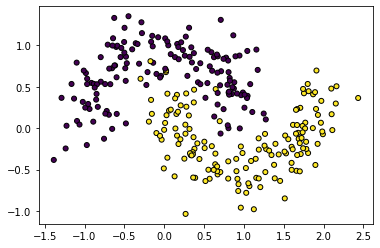

In [3]:
from sklearn.datasets import make_moons

X1, Y1 = make_moons(n_samples=300, noise=0.2)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', s=25, c=Y1, edgecolor='k')

# agrupando a rede com o comando Sequential

## utilizando o nn.Sequential para fazer a rede

In [4]:
input_size = 2
hidden_size = 8
output_size = 1

net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size), #camada hidden -> camada escondida
                    nn.ReLU(), # ativação nao linear
                    nn.Linear(in_features=hidden_size, out_features=output_size)) #output camada de saida

print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [5]:
from torchsummary import summary
summary(net, input_size=(1, input_size), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


## forward

In [6]:
print(X1.dtype)
tensor = torch.from_numpy(X1).float()   ##pelos dados serem do numpy, foi utilizado a função from_numpy, float() para converter o 64 para 32
print(tensor.dtype)

pred   = net(tensor)
print(pred.size())

float64
torch.float32
torch.Size([300, 1])


# agrupando a rede com o comando nn.model()

## utilizando o nn.modele para fazer a rede

### necessário fazer um comando de classe, semelhante a função

In [24]:
### codico nn.module

class minharede(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(minharede, self).__init__()
        
        #Definir a arquitetura
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)
        
     
    def forward(self, X):
        # gerar uma saida a partir do X
        hidden = self.relu(self.hidden(X))
        output = self.output(hidden)
                                
        return output 

In [26]:
input_size = 2
hidden_size = 8
output_size = 1

net = minharede(input_size, hidden_size, output_size)  ## O métoodo __init__()
print(net)

minharede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


## forward

In [27]:
print(X1.dtype)
tensor = torch.from_numpy(X1).float()   ##pelos dados serem do numpy, foi utilizado a função from_numpy, float() para converter o 64 para 32
print(tensor.dtype)

pred   = net(tensor)
print(pred.size())

float64
torch.float32
torch.Size([300, 1])


# subindo as informações para GPU

In [29]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cuda


In [30]:
input_size = 2
hidden_size = 8
output_size = 1

net = minharede(input_size, hidden_size, output_size)  ## O métoodo __init__()
net = net.to(device)   ## para instanciar para a GPU, .to(device)
print(net) 

minharede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [32]:
print(X1.dtype)
tensor = torch.from_numpy(X1).float()   ##pelos dados serem do numpy, foi utilizado a função from_numpy, float() para converter o 64 para 32
print(tensor.dtype)

tensor = tensor.to(device) ## para instanciar para a GPU, .to(device)
# print(tensor)
pred   = net(tensor)
print(pred.size())

float64
torch.float32
torch.Size([300, 1])
